## Reto 4: Regresión Lineal Simple

### 1. Objetivos:
    - Utilizar Regresión Lineal Simple para intentar hacer predicciones entre pares de variables en nuestro dataset
 
---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Tu Reto consiste no solamente en realizar algunas Regresiones Lineales Simples, sino también en preparar un Notebook digno de ser presentado a tus compañeros y la experta. Ésta será la primera vez que hacemos algo así. No te sientas nervioso: ¡estás preparado!

Realiza los siguientes pasos:

1. Lee tu dataset y copia el código del Reto anterior a éste para tener disponible todo el trabajo que realizaste con valores atípicos.
2. Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.
3. Elige 3 pares de variables que te parezcan más prometedores para realizar predicciones.
4. Si es necesario, realiza un poco más de limpieza en esos 3 pares.
5. Por cada par, elige tu variable independiente y dependiente.
6. Crea un modelo por cada par de variables y entrénalos.
7. Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.
8. Obtén el coeficiente de determinación para cada una de tus regresiones.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../Datasets/wine_filtered.csv', index_col=0)
df = df.dropna()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


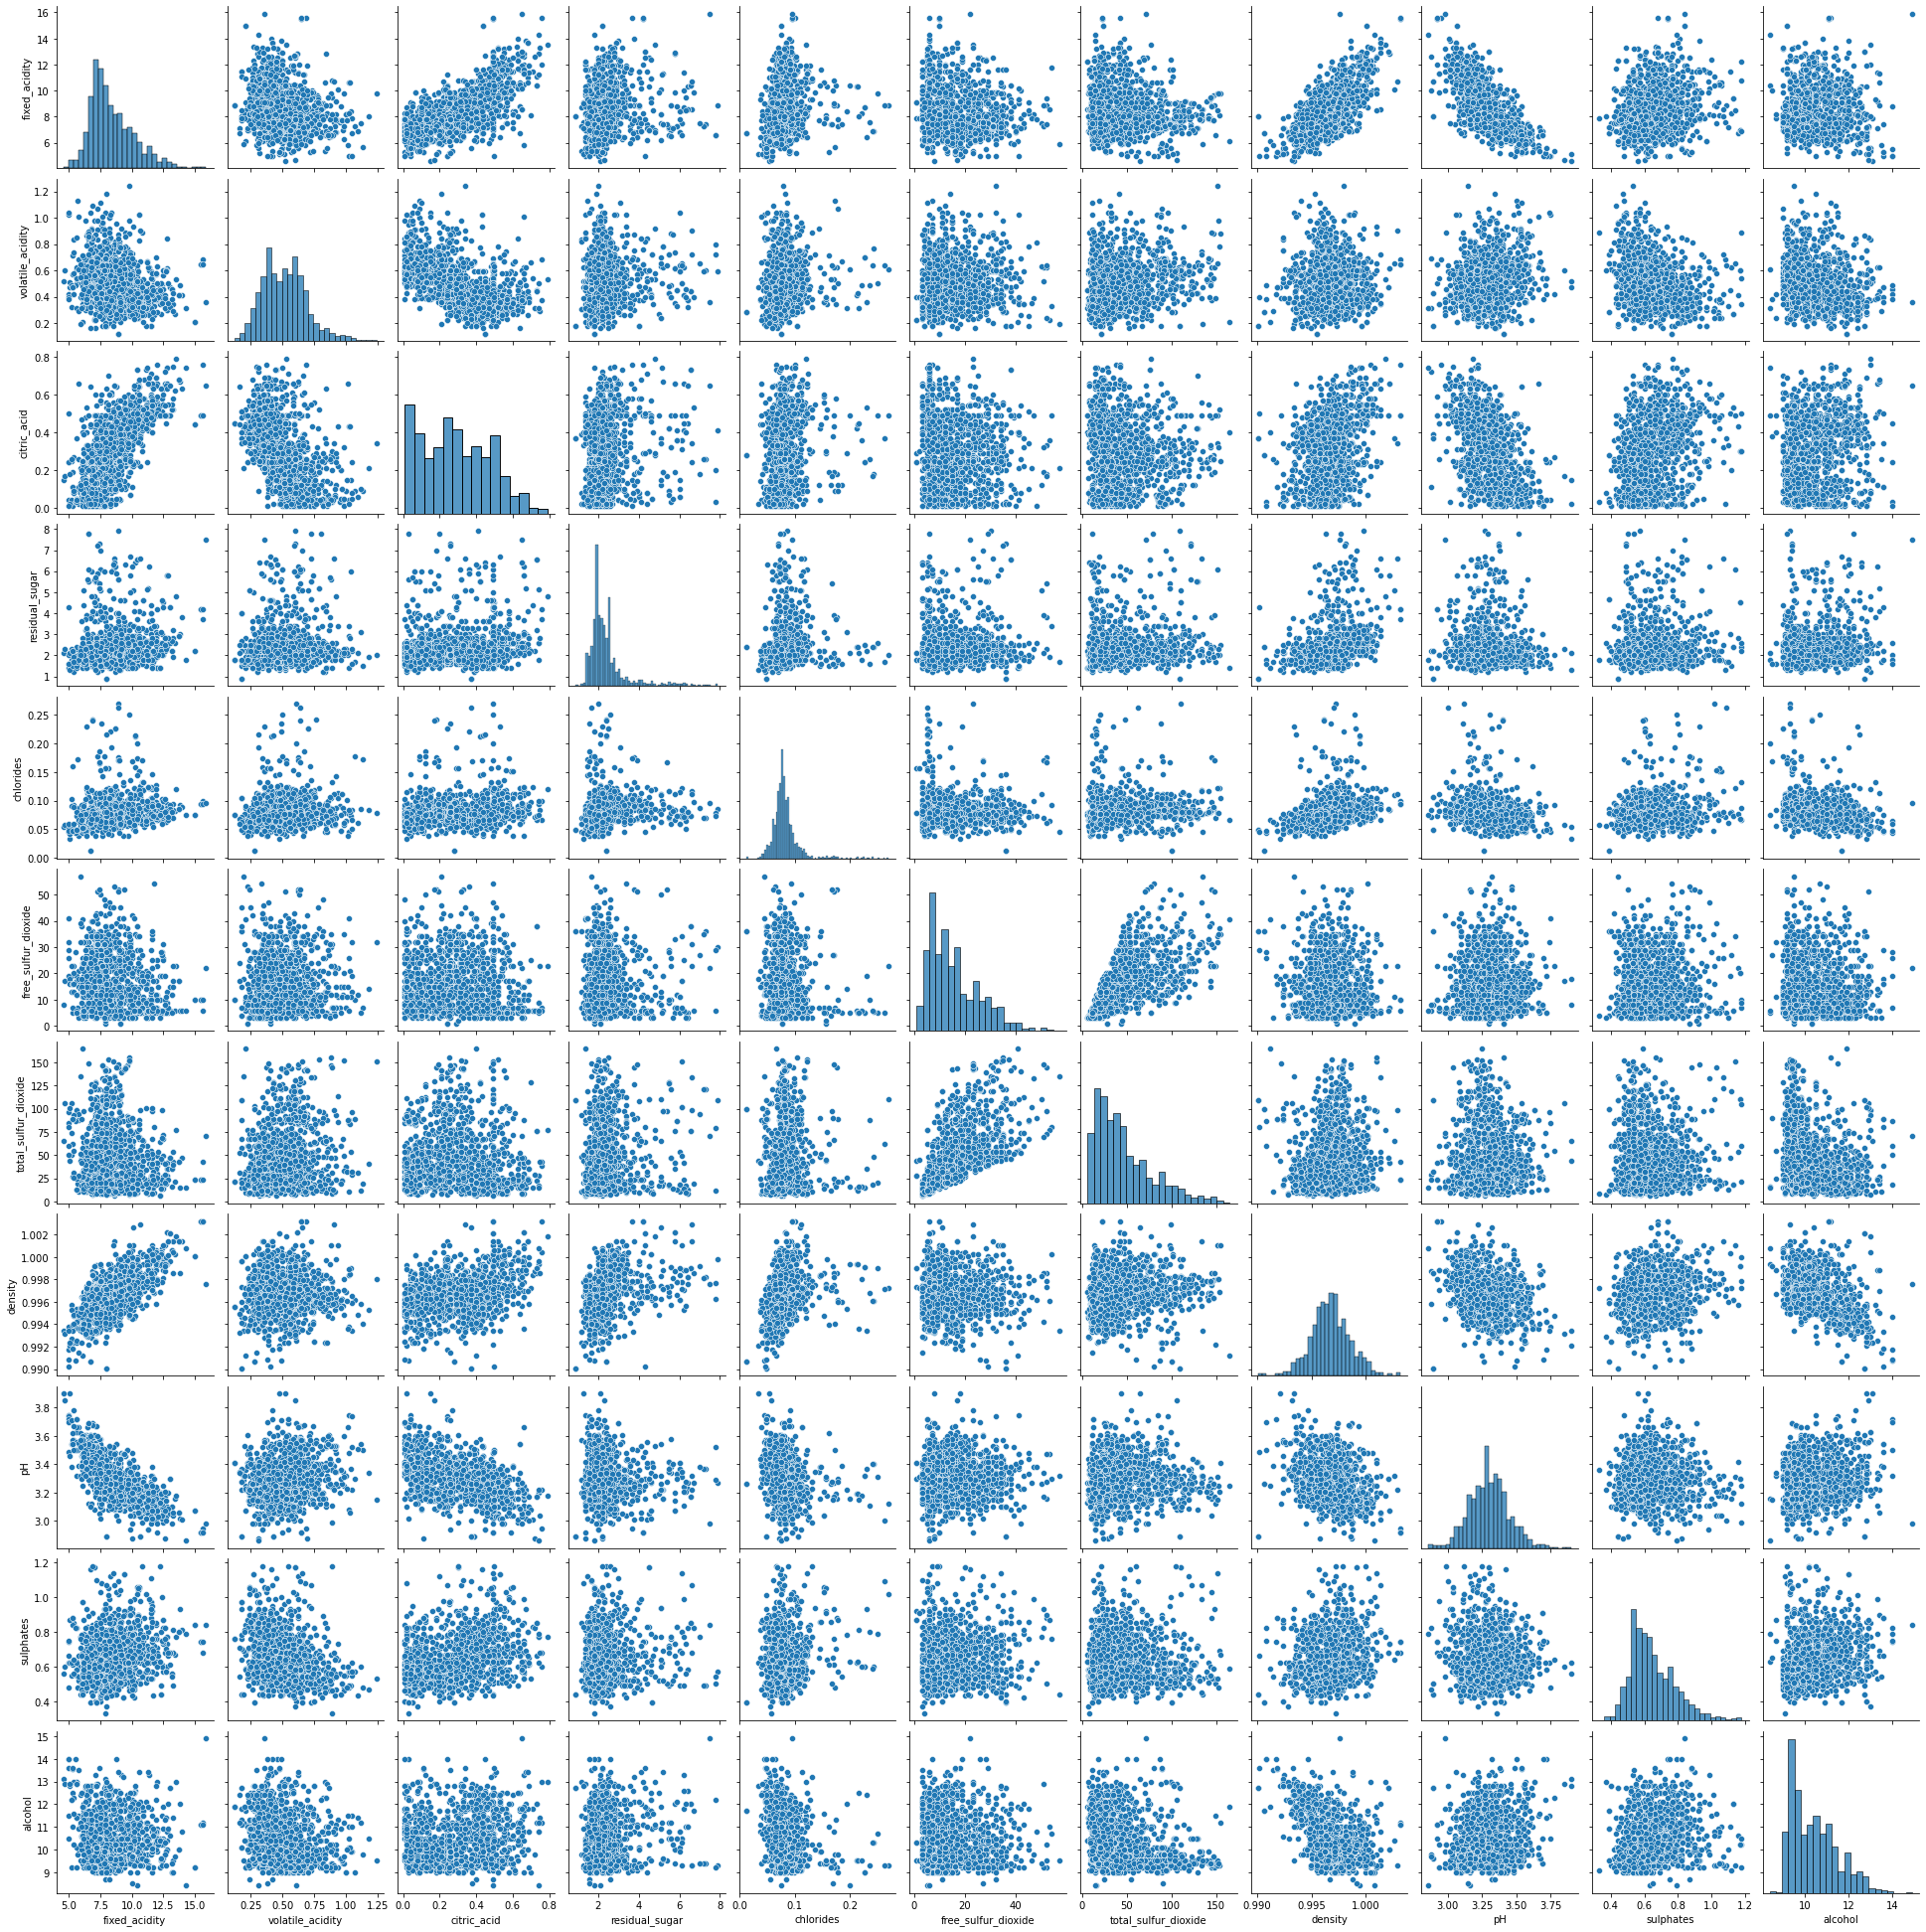

In [50]:
sns.pairplot(df)

In [51]:
df = df[(df["chlorides"] < 0.15) & (df["chlorides"] > 0.02)]

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density', ylabel='fixed_acidity'>

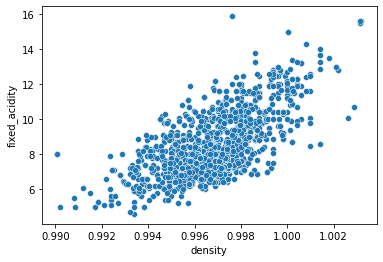

In [52]:
sns.scatterplot(df["density"],df["fixed_acidity"])

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density', ylabel='chlorides'>

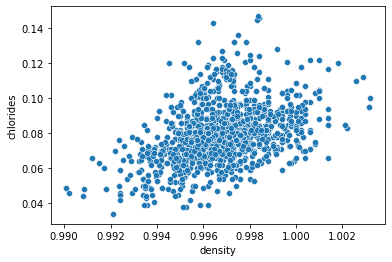

In [53]:
sns.scatterplot(df["density"],df["chlorides"])

In [54]:
df = df[df["fixed_acidity"] < 14]

In [55]:
df = df[df["citric_acid"] > 0.05]

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

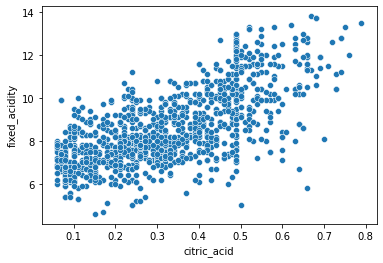

In [56]:
sns.scatterplot(df["citric_acid"],df["fixed_acidity"])

# Modelos de regresión lineal

In [57]:
from sklearn.linear_model import LinearRegression

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


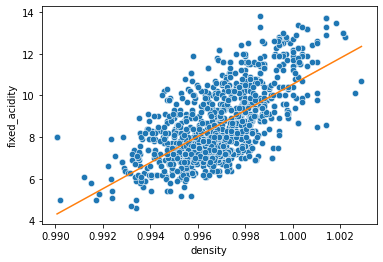

In [58]:
lr = LinearRegression()

serie_1 = df["density"]
serie_2 = df["fixed_acidity"]

lr.fit(serie_1.to_frame(), serie_2)

y_predict = lr.predict(serie_1.to_frame())

sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

In [59]:
np.power(df["density"].corr(df["fixed_acidity"]),2)

0.4370442706782848

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


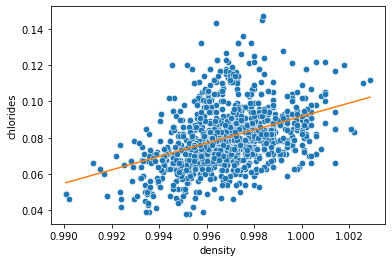

In [60]:
lr2 = LinearRegression()

serie_1 = df["density"]
serie_2 = df["chlorides"]

lr2.fit(serie_1.to_frame(), serie_2)

y_predict = lr2.predict(serie_1.to_frame())

sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E');

In [62]:
np.power(df["density"].corr(df["chlorides"]),2)

0.1635504210896909

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric_acid', ylabel='fixed_acidity'>

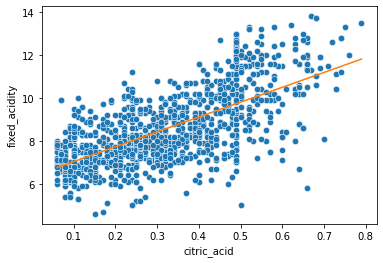

In [66]:
lr3 = LinearRegression()

serie_1 = df["citric_acid"]
serie_2 = df["fixed_acidity"]

lr3.fit(serie_1.to_frame(), serie_2)

y_predict = lr3.predict(serie_1.to_frame())

sns.scatterplot(serie_1, serie_2, s=40);
sns.lineplot(serie_1, y_predict, color='#FF7F0E')


In [63]:
np.power(df["citric_acid"].corr(df["fixed_acidity"]),2)

0.4479539384939826